In [21]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn import metrics
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [2]:
data_train =  pd.read_csv('../data/cidamo/dadosTrain.csv')
data_undersample = pd.read_csv('../data/cidamo/undersample_data.csv')
data_oversample = pd.read_csv('../data/cidamo/oversample_data.csv')
data_smote = pd.read_csv('../data/cidamo/smote_data.csv')

In [3]:
data_test = pd.read_csv('../data/cidamo/dadosTest.csv')

In [4]:
data_train.head()

,Unnamed: 0,X,date,time,cc_num,merchant,category,amt,first,last,...,trans_num,unix_time,merch_lat,merch_long,is_fraud,sec,faixascategory,faixasjob,faixascity,distGeo
0,1,0,2019-01-01,00:00:18,2.703186e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,...,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,18,9,2,1,78773.820754
1,2,1,2019-01-01,00:00:44,6.304233e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,...,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,44,8,2,1,30216.618410
2,3,2,2019-01-01,00:00:51,3.885949e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,...,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,51,1,4,1,108102.911712
3,4,3,2019-01-01,00:01:16,3.534094e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,...,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,76,2,3,7,95685.115476
4,5,4,2019-01-01,00:03:06,3.755342e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,...,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,186,1,1,1,77702.395165


In [5]:
data_train.columns

Index(['Unnamed: 0', 'X', 'date', 'time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'sec', 'faixascategory',
       'faixasjob', 'faixascity', 'distGeo'],
      dtype='object')

In [6]:
atributes = ['amt', 'gender', 'unix_time', 'sec', 'faixascategory', 'faixasjob', 'faixascity', 'distGeo']

## Grid Search

In [7]:
dt = DecisionTreeClassifier(random_state=42)

scoring = {'precision': make_scorer(precision_score, average = 'macro'),
           'recall': make_scorer(recall_score, average = 'macro'),
           'f1': make_scorer(f1_score, average = 'macro')}

grid_values = {'criterion': ['gini', 'entropy'], 'max_depth': [2,3,4,5]}

grid_search_dt = GridSearchCV(dt, param_grid = grid_values, scoring = scoring, refit= 'recall')

## Modelo sem resampling de dados

In [8]:
X_train = data_train[atributes]
y_train = data_train['is_fraud']
X_test = data_test[atributes]
y_test = data_test['is_fraud']

In [9]:
grid_search_dt.fit(X_train, y_train)

/home/cristianom/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cristianom/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cristianom/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cristianom/.local/lib/python3.10/site-packages/sklearn/met

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5]},
             refit='recall',
             scoring={'f1': make_scorer(f1_score, average=macro),
                      'precision': make_scorer(precision_score, average=macro),
                      'recall': make_scorer(recall_score, average=macro)})

In [10]:
gs_params = grid_search_dt.best_params_

In [14]:
dt = DecisionTreeClassifier(random_state=42, criterion=gs_params['criterion'], max_depth=gs_params['max_depth'])
dt = dt.fit(X_train, y_train)
for atribute,importance in zip(X_train.columns,dt.feature_importances_):
    print("{}:{}".format(atribute, importance))

amt:0.6897270239934619
gender:0.0
unix_time:0.0
sec:0.2063451661950029
faixascategory:0.05690237234416067
faixasjob:0.0
faixascity:0.04662560814236938
distGeo:0.0003998293250052352


In [15]:
result = grid_search_dt.predict(X_test)

In [16]:
print(metrics.classification_report(y_test,result))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.14      0.07      0.09      2010

    accuracy                           1.00    555584
   macro avg       0.57      0.53      0.55    555584
weighted avg       0.99      1.00      0.99    555584




ROC AUC:  0.3499376916391354


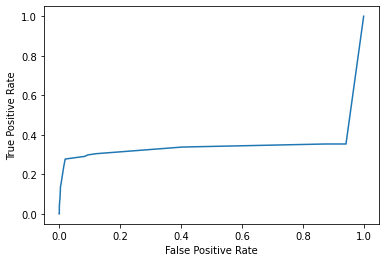

In [23]:
y_predict_proba = dt.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_predict_proba)
print('\nROC AUC: ', metrics.roc_auc_score(y_test, y_predict_proba))

plt.plot(fpr, tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [24]:
print(metrics.confusion_matrix(y_test, result))

[[552725    849]
 [  1870    140]]


## Modelo com Undersample

In [25]:
X_train_under = data_undersample[atributes]
y_train_under = data_undersample['is_fraud']

grid_search_dt.fit(X_train_under, y_train_under)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5]},
             refit='recall',
             scoring={'f1': make_scorer(f1_score, average=macro),
                      'precision': make_scorer(precision_score, average=macro),
                      'recall': make_scorer(recall_score, average=macro)})

In [26]:
gs_params = grid_search_dt.best_params_

In [38]:
dt = DecisionTreeClassifier(random_state=42, criterion=gs_params['criterion'], max_depth=gs_params['max_depth'])
dt = dt.fit(X_train_under, y_train_under)
for atribute,importance in zip(X_train_under.columns,dt.feature_importances_):
    print("{}:{}".format(atribute, importance))

amt:0.7101259237227363
gender:0.0007175216600514063
unix_time:0.0
sec:0.11009524132435565
faixascategory:0.1544835389251182
faixasjob:0.0
faixascity:0.024577774367738465
distGeo:0.0


In [39]:
result = grid_search_dt.predict(X_test)
print(metrics.classification_report(y_test,result))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97    553574
           1       0.02      0.27      0.03      2010

    accuracy                           0.94    555584
   macro avg       0.51      0.60      0.50    555584
weighted avg       0.99      0.94      0.96    555584




ROC AUC:  0.45650206185272374


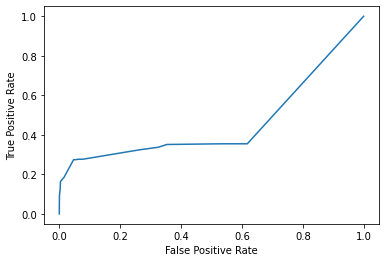

In [40]:
y_predict_proba = dt.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_predict_proba)
print('\nROC AUC: ', metrics.roc_auc_score(y_test, y_predict_proba))

plt.plot(fpr, tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [41]:
print(metrics.confusion_matrix(y_test, result))

[[519199  34375]
 [  1466    544]]


## Modelo com Oversample

In [42]:
X_train_over = data_oversample[atributes]
y_train_over = data_oversample['is_fraud']

grid_search_dt.fit(X_train_over, y_train_over)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5]},
             refit='recall',
             scoring={'f1': make_scorer(f1_score, average=macro),
                      'precision': make_scorer(precision_score, average=macro),
                      'recall': make_scorer(recall_score, average=macro)})

In [43]:
gs_params = grid_search_dt.best_params_

In [44]:
dt = DecisionTreeClassifier(random_state=42, criterion=gs_params['criterion'], max_depth=gs_params['max_depth'])
dt = dt.fit(X_train_over, y_train_over)
for atribute,importance in zip(X_train_over.columns,dt.feature_importances_):
    print("{}:{}".format(atribute, importance))

amt:0.7206769549781553
gender:0.0
unix_time:4.508569625410633e-06
sec:0.10380353540082737
faixascategory:0.154047187462505
faixasjob:0.0
faixascity:0.021467813588886917
distGeo:0.0


In [45]:
result = grid_search_dt.predict(X_test)
print(metrics.classification_report(y_test,result))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97    553574
           1       0.02      0.27      0.03      2010

    accuracy                           0.94    555584
   macro avg       0.51      0.60      0.50    555584
weighted avg       0.99      0.94      0.96    555584




ROC AUC:  0.4548169990333462


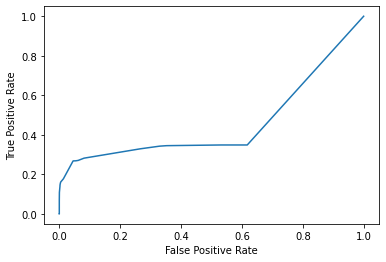

In [46]:
y_predict_proba = dt.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_predict_proba)
print('\nROC AUC: ', metrics.roc_auc_score(y_test, y_predict_proba))

plt.plot(fpr, tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [47]:
print(metrics.confusion_matrix(y_test, result))

[[519199  34375]
 [  1466    544]]


## Modelo com SMOTE

In [48]:
X_train_smote = data_smote[atributes]
y_train_smote = data_smote['is_fraud']

grid_search_dt.fit(X_train_smote, y_train_smote)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5]},
             refit='recall',
             scoring={'f1': make_scorer(f1_score, average=macro),
                      'precision': make_scorer(precision_score, average=macro),
                      'recall': make_scorer(recall_score, average=macro)})

In [49]:
grid_search_dt.best_params_

{'criterion': 'gini', 'max_depth': 5}

In [50]:
dt = DecisionTreeClassifier(random_state=42, criterion=gs_params['criterion'], max_depth=gs_params['max_depth'])
dt = dt.fit(X_train_smote, y_train_smote)
for atribute,importance in zip(X_train_smote.columns,dt.feature_importances_):
    print("{}:{}".format(atribute, importance))

amt:0.7475889922962994
gender:0.004673384252611172
unix_time:0.0
sec:0.12752596560882423
faixascategory:0.0654889220182171
faixasjob:0.0
faixascity:0.05448386260585223
distGeo:0.00023887321819596123


In [70]:
result = grid_search_dt.predict(X_test)
print(metrics.classification_report(y_test,result))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96    553574
           1       0.01      0.12      0.01      2010

    accuracy                           0.92    555584
   macro avg       0.50      0.52      0.48    555584
weighted avg       0.99      0.92      0.96    555584




ROC AUC:  0.21240124889395795


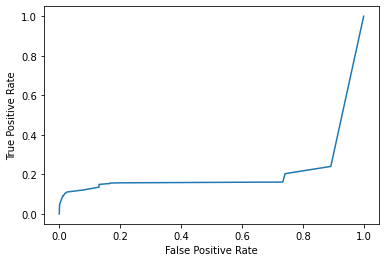

In [51]:
y_predict_proba = dt.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_predict_proba)
print('\nROC AUC: ', metrics.roc_auc_score(y_test, y_predict_proba))

plt.plot(fpr, tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [52]:
print(metrics.confusion_matrix(y_test, result))

[[519199  34375]
 [  1466    544]]
